# Task 4 : To Explore Decision Tree Algorithm

In this task for the given 'Iris' dataset we have to create the Decision Tree classifier and visualize it graphically.

In [1]:
# Importing the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing the dataset
data = pd.read_csv("dataset/Iris.csv")
data.head(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa


### Data Preprocessing

In [3]:
data.drop(['Id'],axis=1,inplace=True)

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From this info we can say that there are no null values present in the datset and all the columns have correct data type.

In [6]:
# Checking for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

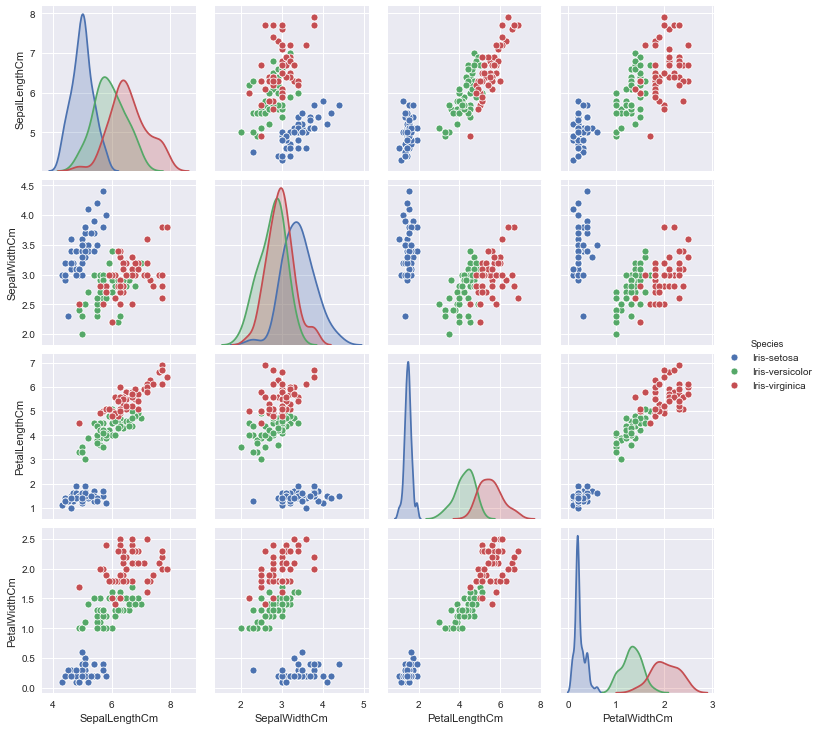

In [27]:
# Pairplot
# It plots pairwise relationship in a datset
sns.pairplot(data, hue = 'Species')
plt.style.use("bmh")
plt.show()

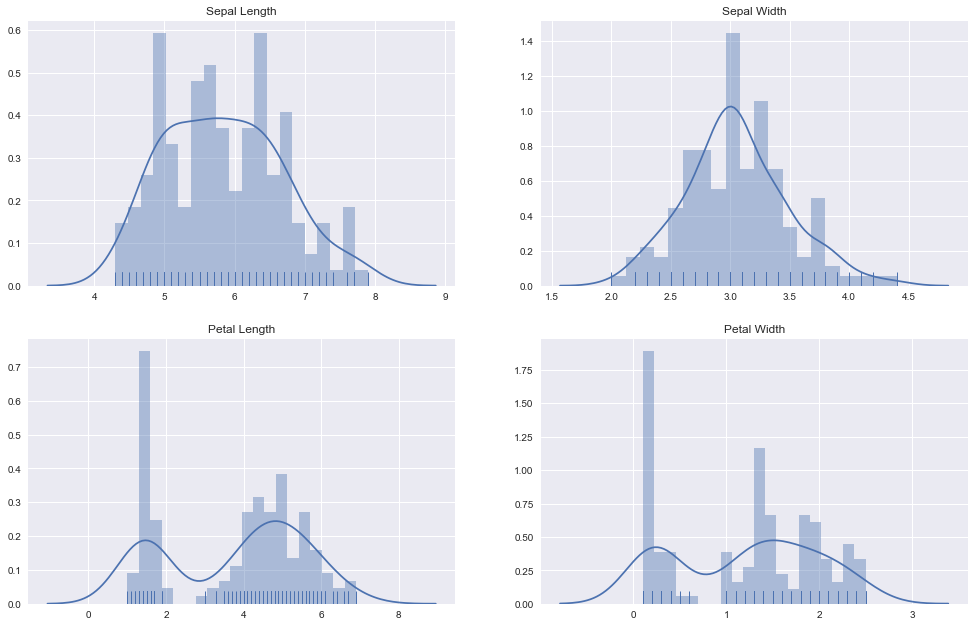

In [26]:
# Subplots
plt.figure(figsize = (15, 10))
plt.style.use("seaborn")
plt.subplot(2, 2, 1)
sns.distplot(data['SepalLengthCm'].values, bins = 20, kde = True, rug = True).set(title = "Sepal Length")
plt.subplot(2, 2, 2)
sns.distplot(data['SepalWidthCm'].values, bins = 20, kde = True, rug = True).set(title = "Sepal Width")
plt.subplot(2, 2, 3)
sns.distplot(data['PetalLengthCm'].values, bins = 20, kde = True, rug = True).set(title = "Petal Length")
plt.subplot(2, 2, 4)
sns.distplot(data['PetalWidthCm'].values, bins = 20, kde = True, rug = True).set(title = "Petal Width")
plt.show()

In [10]:
# Preparing data for Training model
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [11]:
X.shape

(150, 4)

In [12]:
y.shape

(150,)

In [13]:
data.shape

(150, 5)

In [14]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [15]:
# Splitting the DataSet into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_pred = dtc.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [18]:
# Checking the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score For the Model is: {accuracy}")

Accuracy Score For the Model is: 1.0


In [19]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(f"Classification report of the model is\n\n: {cr}")

Classification report of the model is

:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cs = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix of the model is: \n\n {cs}")

Confusion Matrix of the model is: 

 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


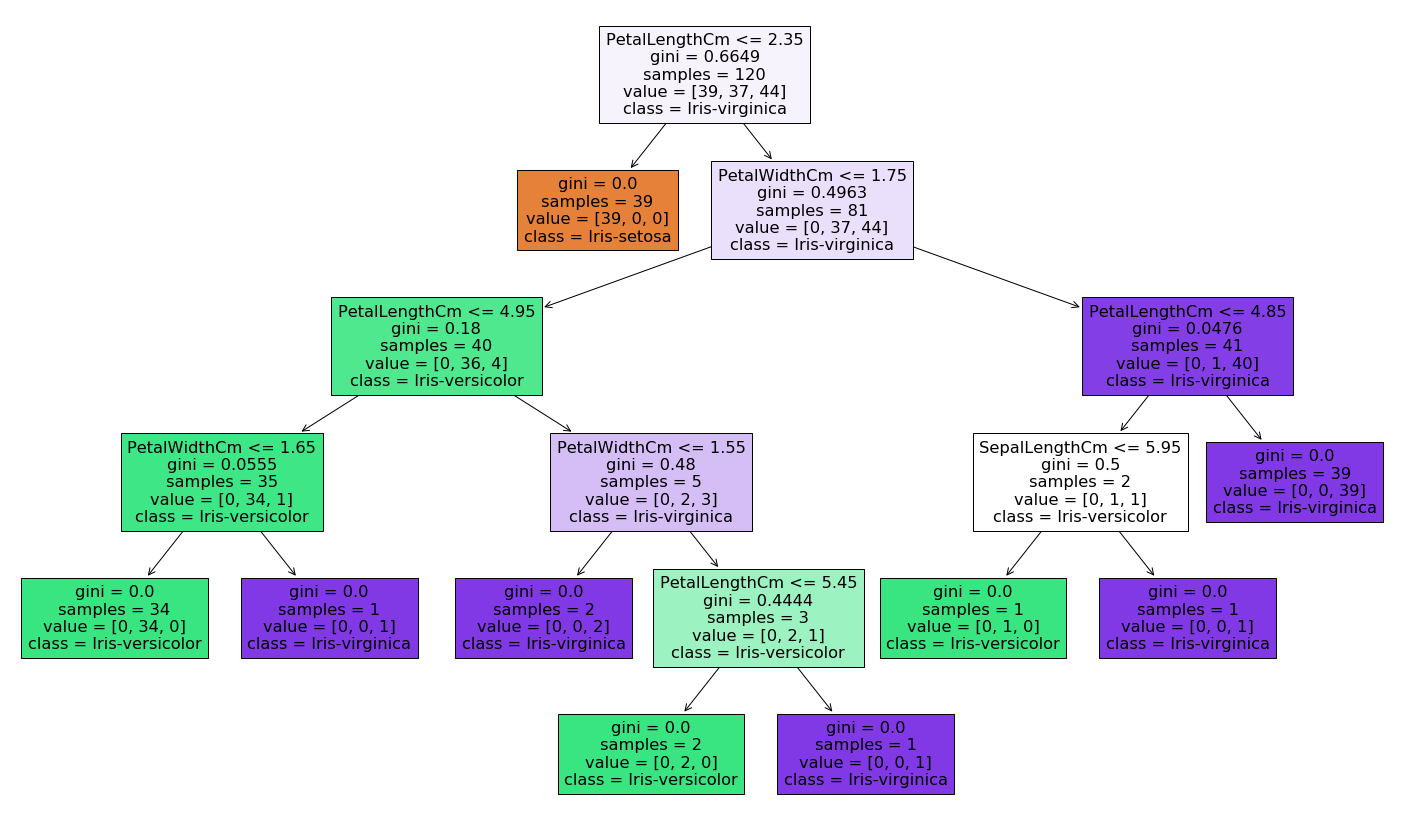

In [21]:
# Plotting Tree
from sklearn.tree import plot_tree

plt.figure(figsize = (25 , 15))
tree = plot_tree(dtc, feature_names = data.columns, class_names=data['Species'].unique().tolist(), precision=4,
                 label = "all", filled = True)
plt.show()